In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btc=pd.read_csv(r"C:\Users\sudhe\OneDrive\Desktop\Hackathon\TideAI\btc_data.csv")

In [3]:
btc.head()

,Date,Close/Last,Open,Sentiment,Price Change,Sentiment weight,Sentiment score
0,03-03-2023,22373.3,23416.5,0,NaN,NaN,NaN
1,02-03-2023,22352.6,23538.6,0,-20.7,1.568673,0.000000
2,01-03-2023,23515.4,23797.2,1,1162.8,33.881173,33.881173
3,28-02-2023,23801.1,23414.8,1,285.7,9.066101,9.066101
4,27-02-2023,23408.4,23491.5,-1,-392.7,12.093364,-12.093364


In [4]:
# Convert the "Date" column to datetime format
btc['Date'] = pd.to_datetime(btc['Date'])

# Set "Date" as the index of the DataFrame
btc.set_index('Date', inplace=True)

In [5]:
btc.head(5)

,Close/Last,Open,Sentiment,Price Change,Sentiment weight,Sentiment score
Date,,,,,,
2023-03-03,22373.3,23416.5,0,NaN,NaN,NaN
2023-02-03,22352.6,23538.6,0,-20.7,1.568673,0.000000
2023-01-03,23515.4,23797.2,1,1162.8,33.881173,33.881173
2023-02-28,23801.1,23414.8,1,285.7,9.066101,9.066101
2023-02-27,23408.4,23491.5,-1,-392.7,12.093364,-12.093364


In [17]:
# Check the shape of the dataset
print(btc.shape)

# Get the summary of the dataframe
btc.info()

# Get the descriptive statistics of numerical columns
btc.describe()

(361, 9)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 361 entries, 2023-03-03 to 2022-06-03
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Close/Last              361 non-null    float64
 1   Open                    361 non-null    float64
 2   Sentiment               361 non-null    int64  
 3   Price Change            360 non-null    float64
 4   Sentiment weight        360 non-null    float64
 5   Sentiment score         360 non-null    float64
 6   sentiment_scaled        361 non-null    float64
 7   close_scaled            361 non-null    float64
 8   sentiment_score_scaled  360 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 28.2 KB


,Close/Last,Open,Sentiment,Price Change,Sentiment weight,Sentiment score,sentiment_scaled,close_scaled,sentiment_score_scaled
count,361.000000,361.000000,361.000000,360.000000,360.000000,360.000000,361.000000,361.000000,360.000000
mean,24850.888920,24903.546260,-0.011080,43.272222,16.630393,1.225124,0.494460,0.284912,0.479307
std,8417.440373,8447.810371,0.942744,818.653012,17.100731,23.831510,0.471372,0.266053,0.125628
min,15836.800000,15817.800000,-1.000000,-3135.700000,1.000000,-89.698817,0.000000,0.000000,0.000000
25%,19309.400000,19341.400000,-1.000000,-320.450000,4.710520,-10.049254,0.000000,0.109760,0.419874
50%,21518.500000,21448.000000,0.000000,-9.500000,10.898020,0.000000,0.500000,0.179584,0.472849
75%,29268.500000,29268.700000,1.000000,357.550000,21.724023,11.098894,1.000000,0.424541,0.531357
max,47475.000000,47470.000000,1.000000,3499.800000,100.000000,100.000000,1.000000,1.000000,1.000000


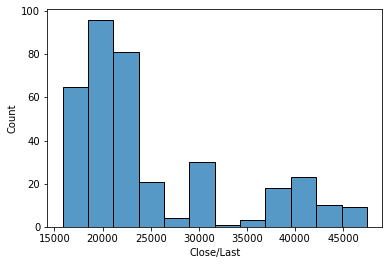

C:\Users\sudhe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


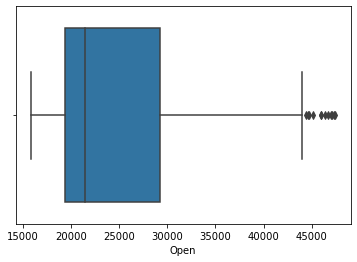

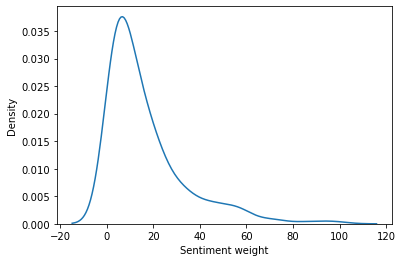

In [30]:
# Visualize the distribution of each column
sns.histplot(btc['Close/Last'])
plt.show()

sns.boxplot(btc['Open'])
plt.show()

sns.kdeplot(btc['Sentiment weight'])
plt.show()

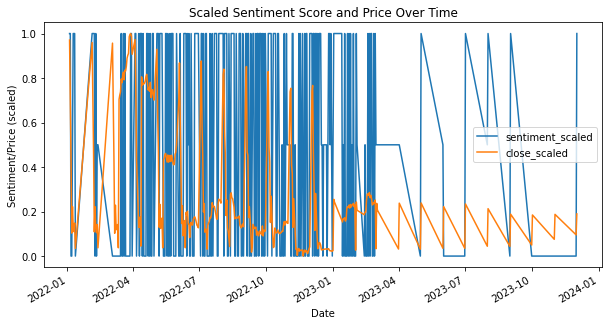

In [19]:
btc['sentiment_score_scaled'] = (btc['Sentiment score'] - btc['Sentiment score'].min()) / (btc['Sentiment score'].max() - btc['Sentiment score'].min())
btc['close_scaled'] = (btc['Close/Last'] - btc['Close/Last'].min()) / (btc['Close/Last'].max() - btc['Close/Last'].min())



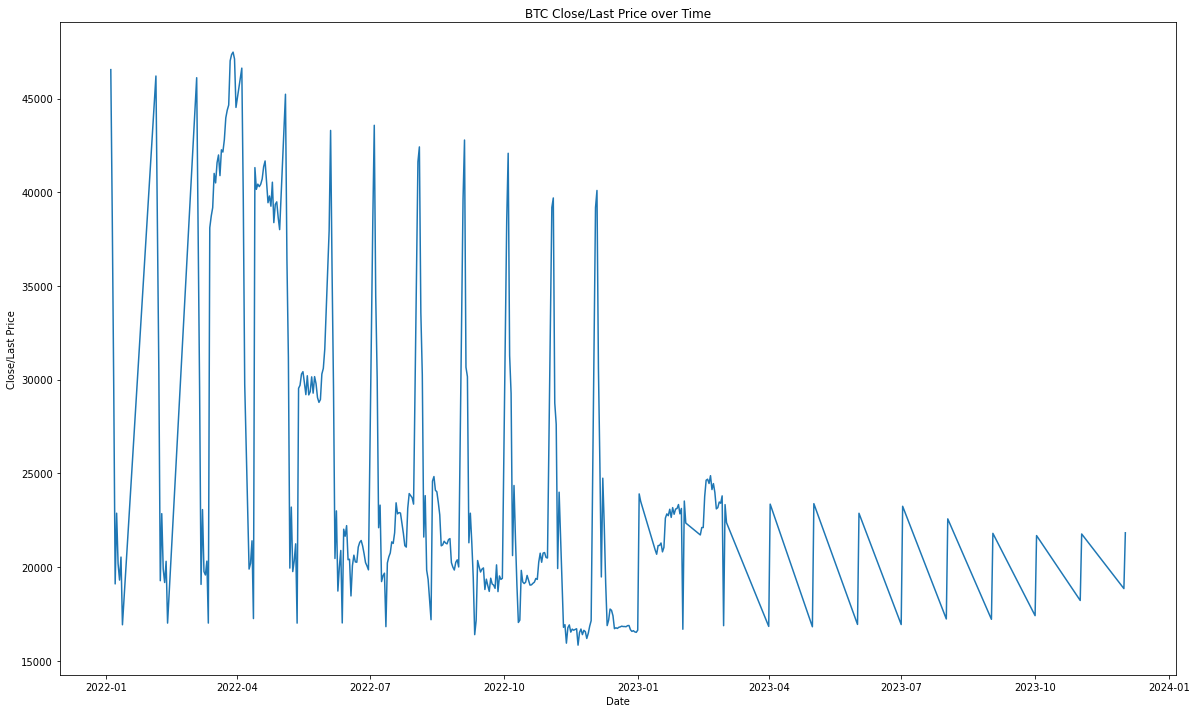

In [27]:
plt.figure(figsize=(20, 12))
sns.lineplot(x=btc.index, y='Close/Last', data=btc)
plt.xlabel('Date')
plt.ylabel('Close/Last Price')
plt.title('BTC Close/Last Price over Time')
plt.show()


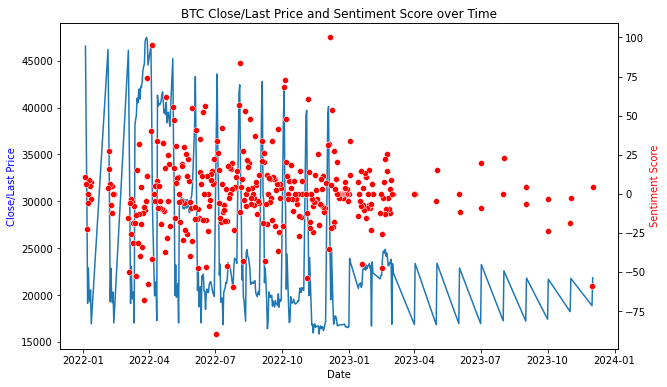

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# plot Close/Last price on the left y-axis
sns.lineplot(x=btc.index, y='Close/Last', data=btc, ax=ax1)
ax1.set_ylabel('Close/Last Price', color='blue')

# plot Sentiment Score on the right y-axis
ax2 = ax1.twinx()
sns.scatterplot(x=btc.index, y='Sentiment score', data=btc, color='red', ax=ax2)
ax2.set_ylabel('Sentiment Score', color='red')

plt.xlabel('Date')
plt.title('BTC Close/Last Price and Sentiment Score over Time')
plt.show()
